<a href="https://colab.research.google.com/github/pgldias/MVP_ML/blob/main/MVP_ML_CSGO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP de Machine Learning – CS:GO Round Winner Prediction

---



**Nome:** Pedro Gateira L. Dias

**Matrícula:** 4052025000042

**Dataset:** [CS:GO Round Snapshots](https://www.kaggle.com/datasets/christianlillelund/csgo-round-winner-classification/data)



#1. Escopo, Objetivo e Definição do Problema

Este trabalho tem como objetivo aplicar técnicas de **Machine Learning** para analisar dados de partidas profissionais de **Counter-Strike: Global Offensive (CS:GO)**, com foco na **previsão do resultado de rodadas** (`round_winner`) a partir de variáveis relacionadas ao estado do jogo (número de jogadores vivos, economia, armamentos, granadas, tempo restante, entre outros).

- **Contexto do problema e objetivo**  
  O CS:GO é um jogo de tiro tático em equipes, no qual as rodadas são vencidas ou perdidas com base em fatores estratégicos e econômicos. A previsão do vencedor da rodada, considerando variáveis antes e durante o round, pode trazer insights valiosos sobre a dinâmica do jogo e os fatores que mais influenciam o desempenho das equipes.  
  O objetivo central é **treinar e avaliar modelos de aprendizado de máquina capazes de prever o vencedor de uma rodada (Terrorists ou Counter-Terrorists) a partir dos dados coletados**.

- **Tipo de tarefa**  
  Trata-se de um problema de **classificação binária**, em que o modelo deve distinguir entre duas classes:  
  - Vitória da equipe **Terrorists (T)**  
  - Vitória da equipe **Counter-Terrorists (CT)**

- **Área de aplicação**  
  Os dados utilizados são **tabulares**, estruturados a partir de telemetria e metadados das rodadas, contendo variáveis numéricas e categóricas.

- **Valor para o negócio/usuário**  
  Apesar de se tratar de um jogo eletrônico, o problema tem aplicações práticas em áreas como:  
  - **Análise de performance**: compreender quais fatores mais impactam a vitória em rodadas.  
  - **Suporte estratégico**: auxiliar na definição de estratégias baseadas em dados.  
  - **Pesquisa em IA e eSports**: explorar a aplicação de modelos preditivos em cenários competitivos, onde múltiplas variáveis influenciam resultados.  
  - **Valor didático**: este trabalho também serve como um exercício acadêmico de aplicação de **boas práticas de Machine Learning** em dados tabulares.  


## Condições de Seleção dos Dados

O dataset utilizado neste trabalho foi originalmente publicado pela [Skybox](https://skybox.gg/) como parte do CS:GO AI Challenge, e reúne dados de partidas profissionais de alto nível disputadas em 2019 e 2020. O conjunto representa snapshots de rodadas coletados sob condições específicas, conforme detalhado abaixo:

- **Partidas profissionais de torneios oficiais**: Os dados foram extraídos exclusivamente de aproximadamente 700 demos de partidas de alto nível, garantindo um padrão elevado de jogabilidade e tomada de decisão estratégica.

- **Rounds válidos apenas**: Foram excluídas do dataset todas as rodadas de aquecimento (*warmups*) e reinícios (*restarts*), mantendo apenas rodadas oficiais e em andamento real.

- **Snapshots a cada 20 segundos**: Durante cada rodada viva, foram capturados snapshots a intervalos fixos de 20 segundos. Isso significa que cada rodada pode ter múltiplas entradas no dataset, registrando o estado do jogo em diferentes momentos da rodada.

- **Recorte até o fim da rodada**: Os snapshots foram registrados até o momento em que a rodada foi decidida, permitindo uma análise da progressão do round, embora não com granularidade de segundo a segundo.

- **Pré-processamento e estrutura plana**: Após a publicação inicial, o dataset passou por um processo de flattening e limpeza, removendo estruturas aninhadas para facilitar a leitura e o uso por algoritmos de machine learning.

- **Número total de snapshots**: O dataset final contém 122.410 snapshots, o que representa uma amostra significativa da dinâmica tática das partidas.

Essas restrições são importantes para delimitar o escopo da análise. Como os dados representam momentos fixos dentro de rodadas de alto nível, as conclusões obtidas podem não ser generalizáveis para jogadores casuais ou partidas com regras alternativas. Além disso, o fato de termos múltiplos snapshots por rodada reforça a necessidade de cuidado ao tratar independência das amostras.


## Limitações Derivadas das Condições de Seleção

Com base nas condições de coleta e pré-processamento do dataset, algumas limitações importantes devem ser consideradas ao interpretar os resultados deste trabalho:

- **Foco em partidas profissionais**: Os dados refletem exclusivamente o estilo de jogo de alto nível competitivo. Ou seja, podem diferir significativamente de partidas casuais ou amadoras.

- **Granularidade temporal limitada**: Embora os snapshots sejam extraídos a cada 20 segundos, isso ainda representa uma visão parcial da rodada. Mudanças rápidas (como trocas de kills ou rotações) podem ocorrer entre os snapshots e não serem registradas.

- **Ausência de histórico sequencial por rodada**: Informações como o histórico econômico da equipe, streaks de vitórias, ou mudanças no armamento anterior ao snapshot não estão disponíveis.

- **Potencial dependência entre snapshots**: Como múltiplos snapshots podem vir de uma mesma rodada, há risco de dependência entre algumas observações. Isso pode impactar análises que assumem independência entre amostras, como validação cruzada ou modelos supervisionados.

Essas limitações não comprometem a qualidade do dataset, mas é importantes que sejam consideradas na interpretação dos resultados e  eventual validação de modelos preditivos.


## Dicionário de Atributos

O dataset contém 97 atributos, a seguir estão listados os principais atributos com suas respectivas definições:

### Informações da Rodada
- **time_left**: Tempo restante na rodada atual (em segundos).
- **map**: Mapa em que a rodada está sendo jogada (ex.: `de_dust2`, `de_inferno`, `de_overpass`).
- **bomb_planted**: Indica se a bomba foi plantada (`False` = não, `True` = sim).
- **round_winner**: Equipe vencedora da rodada (`CT` para Counter-Terrorists, `T` para Terrorists).

### Placar
- **ct_score**: Pontuação atual da equipe Counter-Terrorist.
- **t_score**: Pontuação atual da equipe Terrorist.

### Estado dos Jogadores
- **ct_players_alive**: Número de jogadores vivos na equipe Counter-Terrorist (0 a 5).
- **t_players_alive**: Número de jogadores vivos na equipe Terrorist (0 a 5).
- **ct_health**: Soma da saúde de todos os jogadores vivos da equipe CT (cada jogador varia de 0 a 100).
- **t_health**: Soma da saúde de todos os jogadores vivos da equipe T.
- **ct_armor**: Soma da armadura de todos os jogadores da equipe CT.
- **t_armor**: Soma da armadura de todos os jogadores da equipe T.
- **ct_helmets**: Quantidade de jogadores com capacete na equipe CT.
- **t_helmets**: Quantidade de jogadores com capacete na equipe T.

### Economia
- **ct_money**: Soma total do dinheiro disponível da equipe CT (em dólares).
- **t_money**: Soma total do dinheiro disponível da equipe T (em dólares).
- **ct_defuse_kits**: Quantidade de kits de desarme com a equipe CT.

### Armas
- **ct_weapon_X**: Quantidade de jogadores com a arma X na equipe CT. Exemplos de X: `AK47`, `Deagle`, `UMP45`.
- **t_weapon_X**: Quantidade de jogadores com a arma X na equipe T.

### Granadas
- **ct_grenade_X**: Quantidade de granadas do tipo X na equipe CT. Exemplos de X: `HeGrenade`, `Flashbang`, `SmokeGrenade`.
- **t_grenade_X**: Quantidade de granadas do tipo X na equipe T.

---

Esses atributos representam o estado da partida em momentos específicos durante as rodadas, registrados em snapshots a cada 20 segundos. A maioria dos campos é numérica e reflete contagens ou somatórios por equipe.


# 2. Imports e Carga dos Dados

In [5]:
# Built-in
import os
import sys
import math
import random
import time

# Terceiros
import kagglehub
from kagglehub import KaggleDatasetAdapter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import randint

# Scikit-learn
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay



In [6]:
# Reprodutibilidade
SEED = 0
np.random.seed(SEED)
random.seed(SEED)

# Para frameworks que suportam seed adicional (ex.: PyTorch/TensorFlow), documente aqui:
# import torch; torch.manual_seed(SEED); torch.cuda.manual_seed_all(SEED)
# import tensorflow as tf; tf.random.set_seed(SEED)

print("Python:", sys.version.split()[0])
print("Seed global:", SEED)

Python: 3.12.11
Seed global: 0


In [7]:
# Se for a primeira execução talvez seja necessário descomentar a linha abaixo

# !pip install -q kagglehub[pandas-datasets]

In [8]:
# Define o nome exato do arquivo dentro do dataset
file_path = "csgo_round_snapshots.csv"

# Carrega o dataset usando KaggleHub
df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "christianlillelund/csgo-round-winner-classification",
    file_path
)

# Visualiza as primeiras linhas
df.head(3)


/tmp/ipython-input-2375038771.py:5: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'csgo-round-winner-classification' dataset.


,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT


## Utils

Funções utilizadas ao longo do notebook. Funções de pipeline poderiam estar descritas aqui, mas por organização do notebook preferi deixar em cada seção.

In [9]:
# Configurações globais de estilo e cores do notebook
# Paleta de cores inspirada nas equipes do CS:GO para facilitar identidade das equipes.

colors_csgo = {
    "neutral": "#A9A9A9", # Cinza para dados neutros
    "T": "#E6B800",     # Amarelo/dourado - Terroristas (T)
    "CT": "#3366CC",    # Azul escuro - Contra-Terroristas (CT)
    "T_dark": "#B38600",
    "CT_dark": "#254E89"
}

# Setando estilo global
sns.set_style("whitegrid")
sns.set_palette([colors_csgo["CT"], colors_csgo["T"]])
sns.set_context("notebook", font_scale=1.0, rc={"figure.figsize": (15, 8)})
sns.set_theme(style="whitegrid", palette=colors_csgo.values(), font_scale=1.0)



In [10]:
# Funções de visualização

# Plota a distribuição das classes (ex: CT vs T) em forma de barras.
def plot_class_distribution(df, column, title=None):
    plt.figure(figsize=(7, 5))
    sns.countplot(data=df, x=column, hue='round_winner', legend=True, palette={
        'CT': colors_csgo['CT'],
        'T': colors_csgo['T']
    })
    plt.title(title if title else f'Distribuição de {column}')
    plt.xticks(rotation=45)
    plt.xlabel(column)
    plt.ylabel('Contagem')
    plt.tight_layout()
    plt.show()

# 3. Análise Exploratória Resumida (EDA)

A Análise Exploratória de Dados (EDA) tem como objetivo principal compreender melhor a estrutura do dataset, identificar padrões, detectar anomalias, valores ausentes e outras características relevantes que possam influenciar nas próximas etapas do projeto.

Nesta seção, serão utilizadas estatísticas descritivas e visualizações gráficas para entender a distribuição das variáveis e suas possíveis relações com o resultado da rodada. Esta análise também serve como base para validar ou refinar as hipóteses levantadas anteriormente.


In [11]:
# Informação dos atributos, verificação de valores nulos e tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 97 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   time_left                     122410 non-null  float64
 1   ct_score                      122410 non-null  float64
 2   t_score                       122410 non-null  float64
 3   map                           122410 non-null  object 
 4   bomb_planted                  122410 non-null  bool   
 5   ct_health                     122410 non-null  float64
 6   t_health                      122410 non-null  float64
 7   ct_armor                      122410 non-null  float64
 8   t_armor                       122410 non-null  float64
 9   ct_money                      122410 non-null  float64
 10  t_money                       122410 non-null  float64
 11  ct_helmets                    122410 non-null  float64
 12  t_helmets                     122410 non-nul

Pela info() já podemos ver que não teremos que tratar dados nulos nesse dataset, todas as colunas estão preenchidas.

In [12]:
# estatísticas descritivas básicas do dataset
df.describe()

,time_left,ct_score,t_score,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,...,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade
count,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,...,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000
mean,97.886922,6.709239,6.780435,412.106568,402.714500,314.142121,298.444670,9789.023773,11241.036680,2.053901,...,1.853157,1.858100,1.540814,1.627146,1.001969,0.019819,0.048011,1.352095,0.027694,0.025750
std,54.465238,4.790362,4.823543,132.293290,139.919033,171.029736,174.576545,11215.042286,12162.806759,1.841470,...,1.772791,1.794473,1.737804,1.829147,1.458084,0.143933,0.227669,1.663246,0.169531,0.164162
min,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,54.920000,3.000000,3.000000,350.000000,322.000000,194.000000,174.000000,1300.000000,1550.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,94.910000,6.000000,6.000000,500.000000,500.000000,377.000000,334.000000,5500.000000,7150.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,166.917500,10.000000,10.000000,500.000000,500.000000,486.000000,468.000000,14600.000000,18000.000000,4.000000,...,3.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000
max,175.000000,32.000000,33.000000,500.000000,600.000000,500.000000,500.000000,80000.000000,80000.000000,5.000000,...,7.000000,7.000000,6.000000,9.000000,5.000000,3.000000,3.000000,5.000000,3.000000,2.000000


Pela describe() já podemor ver que existe uma diferença nos ranges de valores, provavelmente será necessária uma normalização. Além disso alguns valores me parecem impossíveis dentro do meu conhecimento do jogo (ex.: max de smoke_granades ser maior que 5; ou t_health > 500).

## Validação e Limpeza de Dados

Durante a análise exploratória inicial, foram identificados alguns valores inconsistentes ou fisicamente impossíveis no dataset. Por exemplo, o valor de `t_health` ultrapassando o limite de 500 (o que excede o total possível de saúde para 5 jogadores vivos).

Essa etapa tem como objetivo eliminar ou corrigir esses registros inválidos, de modo a garantir integridade e confiabilidade nas próximas análises e modelagens.


In [13]:
# Cópia do DataFrame original
df_check = df.copy()

# Condições de valores inválidos conhecidas previamente
invalid_conditions = {
    'ct_health > 500': df_check['ct_health'] > 500,
    't_health > 500': df_check['t_health'] > 500,
    'ct_players_alive > 5': df_check['ct_players_alive'] > 5,
    't_players_alive > 5': df_check['t_players_alive'] > 5,
    'ct_helmets > 5': df_check['ct_helmets'] > 5,
    't_helmets > 5': df_check['t_helmets'] > 5,
    'ct_defuse_kits > 5': df_check['ct_defuse_kits'] > 5,
    'ct_money < 0 or > 80000': (df_check['ct_money'] < 0) | (df_check['ct_money'] > 80000),
    't_money < 0 or > 80000': (df_check['t_money'] < 0) | (df_check['t_money'] > 80000),
    'time_left < 0 or > 175': (df_check['time_left'] < 0) | (df_check['time_left'] > 175),
}

# Detecta granadas acima de 5 (exceto flashbangs, que podem ser até 10)
granadas_ct = [col for col in df.columns if col.startswith("ct_grenade_")]
granadas_t = [col for col in df.columns if col.startswith("t_grenade_")]

for col in granadas_ct + granadas_t:
    limite = 10 if "flashbang" in col.lower() else 5
    invalid_conditions[f'{col} > {limite}'] = df_check[col] > limite

# Quantidade de registros afetados por condição
print("Registros inválidos por condição:\n")
for description, condition in invalid_conditions.items():
    print(f"{description}: {condition.sum()} registros")

# Total de registros inválidos únicos
mascara_combinada = pd.concat(invalid_conditions.values(), axis=1).any(axis=1)
registros_invalidos = df_check[mascara_combinada]

print(f"\nTotal de registros inválidos únicos: {registros_invalidos.shape[0]}")


Registros inválidos por condição:

ct_health > 500: 0 registros
t_health > 500: 1 registros
ct_players_alive > 5: 0 registros
t_players_alive > 5: 1 registros
ct_helmets > 5: 0 registros
t_helmets > 5: 0 registros
ct_defuse_kits > 5: 0 registros
ct_money < 0 or > 80000: 0 registros
t_money < 0 or > 80000: 0 registros
time_left < 0 or > 175: 0 registros
ct_grenade_hegrenade > 5: 0 registros
ct_grenade_flashbang > 10: 0 registros
ct_grenade_smokegrenade > 5: 1 registros
ct_grenade_incendiarygrenade > 5: 0 registros
ct_grenade_molotovgrenade > 5: 0 registros
ct_grenade_decoygrenade > 5: 0 registros
t_grenade_hegrenade > 5: 0 registros
t_grenade_flashbang > 10: 0 registros
t_grenade_smokegrenade > 5: 1 registros
t_grenade_incendiarygrenade > 5: 0 registros
t_grenade_molotovgrenade > 5: 0 registros
t_grenade_decoygrenade > 5: 0 registros

Total de registros inválidos únicos: 3


In [14]:
# Tratamento replicado no pipeline, para facilitar com novos dados se fosse o caso

Case1 = df[df['t_players_alive']>5]
Case2 = df[df['t_grenade_smokegrenade']>5]
Case3 = df[df['ct_grenade_smokegrenade']>5]

# Concatena os índices dos casos inválidos
indexes_to_remove = pd.concat([Case1, Case2, Case3]).index.unique()

# Remove do DataFrame original
df_clean = df.drop(index=indexes_to_remove)

print(f'Total de registros antes da limpeza: {df.shape[0]}' )

print(f'Total de registros após limpeza: {df_clean.shape[0]}')

df = df_clean.copy()


Total de registros antes da limpeza: 122410
Total de registros após limpeza: 122407


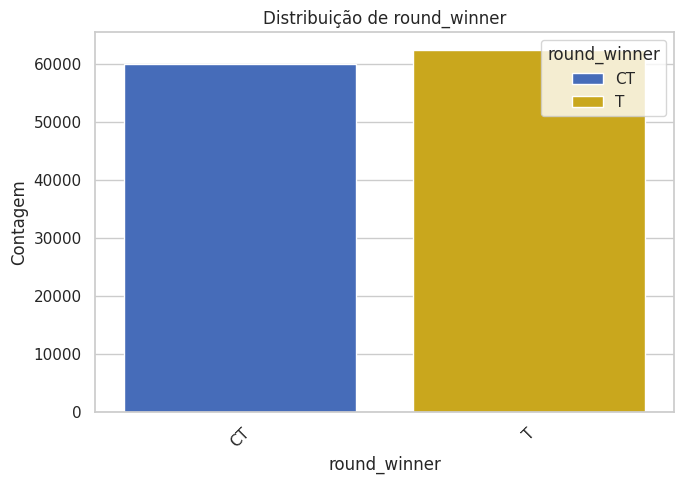

In [15]:
# Esse gráfico foi plotado para testar o balanceamento das variaveis alvo, podemos ver que está relativamente balanceado.

plot_class_distribution(df, 'round_winner')

Esse gráfico permite verificar o balanceamento entre vitórias dos CTs e Ts. Pode indicar se o dataset está equilibrado ou se há viés para um dos lados — o que é importante para modelagem supervisionada.

In [16]:

df.groupby('round_winner').describe(percentiles=None).transpose()

#Foi transposta para facilitar a leitura e exploração

round_winner                            CT             T
time_left              count  60004.000000  62403.000000
                       mean     101.719145     94.198317
                       std       52.794006     55.776362
                       min        0.080000      0.010000
                       25%       54.950000     46.880000
...                                    ...           ...
t_grenade_decoygrenade min        0.000000      0.000000
                       25%        0.000000      0.000000
                       50%        0.000000      0.000000
                       75%        0.000000      0.000000
                       max        2.000000      2.000000

[752 rows x 2 columns]

## Influência dos Mapas

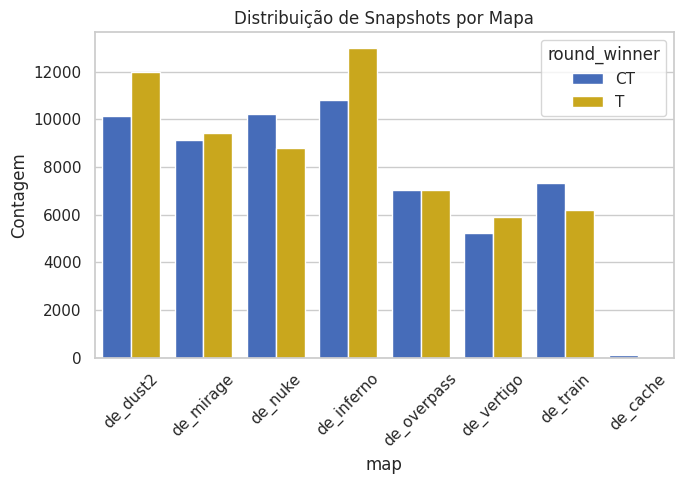

In [17]:
plot_class_distribution(df, 'map', title="Distribuição de Snapshots por Mapa")


Mapas no CS:GO possuem layouts assimétricos, com posições e distâncias que podem favorecer CTs ou Ts.

O gráfico revela tanto o número de snapshots por mapa quanto o time que venceu mais rodadas em cada um. Observamos:

- Mapas como `de_dust2` e `de_inferno` apresentam vantagem clara para o time Terrorista.
- Já `de_nuke` e `de_train` favorecem o time CT.
- Além disso, há forte desbalanceamento no volume de dados por mapa, com `de_inferno` e `de_dust2` sendo os mais frequentes.

Esse cenário apresenta dois desafios:

1. **Viés potencial**: Se certas vitórias estão mais associadas a mapas específicos, o modelo pode aprender padrões falsos.
2. **Desbalanceamento de amostras**: Modelos podem superestimar os padrões de mapas mais frequentes e subestimar mapas menos representados.

Esses fatores devem ser considerados no pré-processamento e modelagem, a fim de garantir generalização e imparcialidade nos resultados.


Para mitigar isso poderiamos:
- Balancear amostras por mapa (downsample dos mais frequentes ou usar amostragem estratificada);

- Criar uma variável categórica “map” como feature, mas monitorar sua importância e interações;

- Treinar e avaliar o modelo separadamente por mapa;

- Remover mapas com dados insignificantes ou desatualizados (ex: de_cache)



## Análises gerais de correlação

In [18]:
# # Ficou muito dificíl a leitura com todas as 97 colunas, por isso está comentado.
# # Correlação entre variáveis numéricas
# correlation_matrix = df.corr(numeric_only=True)
# plt.figure(figsize=(120, 80))
# sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
# plt.title("Matriz de Correlação")
# plt.show()

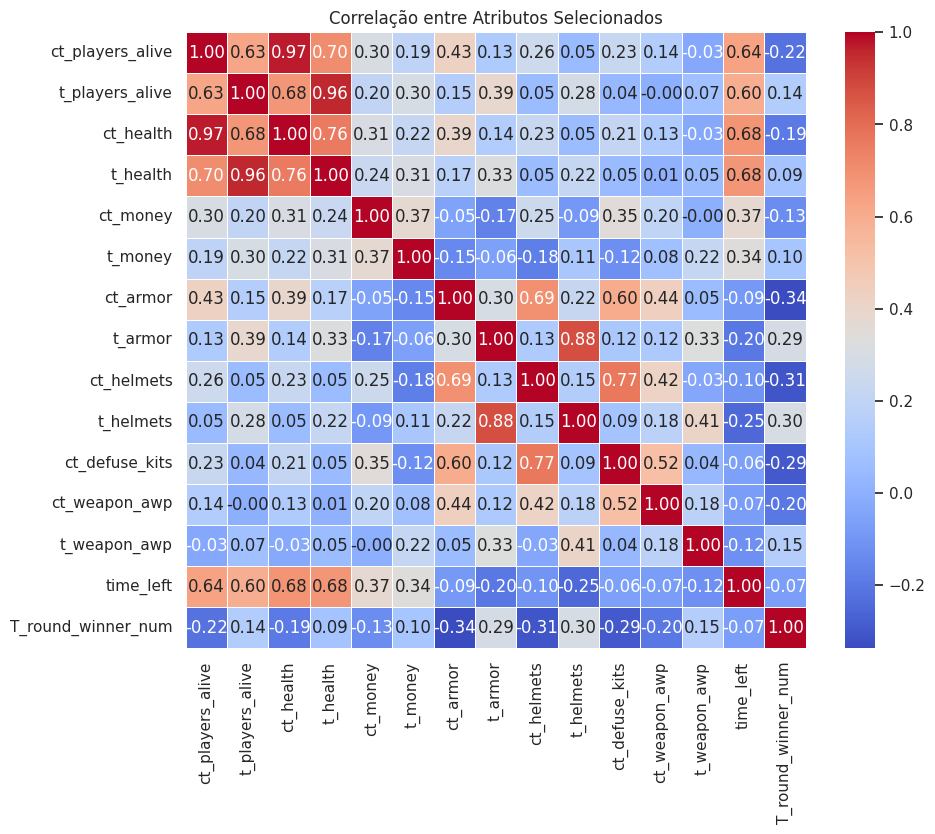

In [19]:
cols_of_interest = [
    'ct_players_alive', 't_players_alive',
    'ct_health', 't_health',
    'ct_money', 't_money',
    'ct_armor', 't_armor',
    'ct_helmets', 't_helmets',
    'ct_defuse_kits', 'ct_weapon_awp', 't_weapon_awp', 'time_left'
]

# Adiciona round_winner como numérico (temporariamente, apenas para visualização, interpretação seria de quando o T ganha o round)
df_corr = df.copy()
df_corr['T_round_winner_num'] = df_corr['round_winner'].map({'CT': 0, 'T': 1})

# Calcula e plota
corr_subset = df_corr[cols_of_interest + ['T_round_winner_num']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_subset, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlação entre Atributos Selecionados")
plt.show()


A matriz de correlação gerada permite identificar relações lineares entre variáveis numéricas do conjunto de dados. A seguir, destacam-se algumas correlações relevantes observadas:

- As variáveis `ct_players_alive` e `ct_health`, assim como `t_players_alive` e `t_health`, apresentam forte correlação positiva. Isso era esperado, uma vez que, quanto maior o número de jogadores vivos, maior tende a ser a soma total de vida da equipe.

- Uma correlação significativa também foi observada entre `ct_armor` e `ct_helmets`. Embora nem sempre a presença de armadura implique o uso de capacete, é comum que jogadores com capacete também tenham adquirido armadura, o que explica a associação entre essas variáveis.

- A variável `time_left` também se correlaciona com o número de jogadores vivos nas duas equipes. Isso ocorre porque, no início da rodada (quando há mais tempo restante), é mais provável que todos os jogadores ainda estejam vivos. Com o avanço da rodada e a redução do tempo, as eliminações se acumulam, reduzindo o número de jogadores vivos.

- Por fim, observou-se uma correlação negativa entre a variável-alvo `round_winner` (codificada como 1 para vitória dos Terroristas) e atributos defensivos do lado Counter-Terrorist, como `ct_armor`, `ct_defuse_kits` e `ct_weapon_awp`. Isso sugere que, nas rodadas vencidas pelos Terroristas, é comum que o lado CT esteja em condições econômicas ou estratégicas menos favoráveis.

Essas correlações fornecem insights valiosos que orientam tanto a engenharia de atributos quanto a seleção de variáveis relevantes para a modelagem futura.


# Balanceamento

### Balanceamento por Mapa

Durante o pré-processamento, identificamos a presença do mapa `de_cache`, que foi **removido da rotação competitiva do CS:GO em 2019**, sendo substituído por `de_vertigo` e por isso possui muitos poucas amostras. Por esse motivo, decidimos **remover completamente os registros com `de_cache`** do dataset, focando apenas nos mapas oficiais que compõem a rotação competitiva no período analisado.

### Mapas considerados após filtragem:

- `de_inferno`
- `de_dust2`
- `de_nuke`
- `de_mirage`
- `de_overpass`
- `de_train`
- `de_vertigo`

### Estratégia de Balanceamento (downsampling)

Em seguida, aplicamos uma estratégia de **balanceamento por downsampling**, igualando a quantidade de snapshots entre os mapas ao **valor mínimo automaticamente detectado entre eles**. Essa abordagem visa:

- Evitar viés para mapas mais frequentes, como `de_inferno`;
- Assegurar que o modelo não aprenda padrões específicos baseados na frequência dos mapas;
- Promover justiça tática entre os contextos das partidas analisadas.

Essa etapa reforça a consistência e a equidade dos dados que serão usados para treinamento e avaliação dos modelos.


In [20]:
# Verifica quantas amostras existem por mapa
map_counts = df['map'].value_counts()
min_samples = map_counts.min()

print("Quantidade de snapshots por mapa (antes do balanceamento):")
display(map_counts)

# Lista dos mapas oficiais no seu dataset (sem o de_cache)
map_pool = [
    'de_inferno', 'de_dust2', 'de_nuke',
    'de_mirage', 'de_overpass', 'de_train', 'de_vertigo'
]

# Filtra o DataFrame original para manter apenas os mapas da rotação
df_csgo_filtered = df[df['map'].isin(map_pool)]

# Aplica balanceamento: downsampling para o número mínimo automaticamente detectado
min_snapshots = df_csgo_filtered['map'].value_counts().min()

df_balanced_maps = (
    df_csgo_filtered
    .groupby('map')
    .apply(lambda x: x.sample(n=min_snapshots, random_state=SEED)) # A seed fornecida garante a reprodutibilidade desse downsampling, se não toda vez que rodar teria um resultado diferente
    .reset_index(drop=True)
)

# Verificação da nova distribuição
print("✅ Snapshots por mapa (após balanceamento automático):")
display(df_balanced_maps['map'].value_counts())


Quantidade de snapshots por mapa (antes do balanceamento):


,count
map,
de_inferno,23809
de_dust2,22144
de_nuke,19025
de_mirage,18576
de_overpass,14081
de_train,13491
de_vertigo,11136
de_cache,145


✅ Snapshots por mapa (após balanceamento automático):


/tmp/ipython-input-77164793.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=min_snapshots, random_state=SEED)) # A seed fornecida garante a reprodutibilidade desse downsampling, se não toda vez que rodar teria um resultado diferente


,count
map,
de_dust2,11136
de_inferno,11136
de_mirage,11136
de_nuke,11136
de_overpass,11136
de_train,11136
de_vertigo,11136


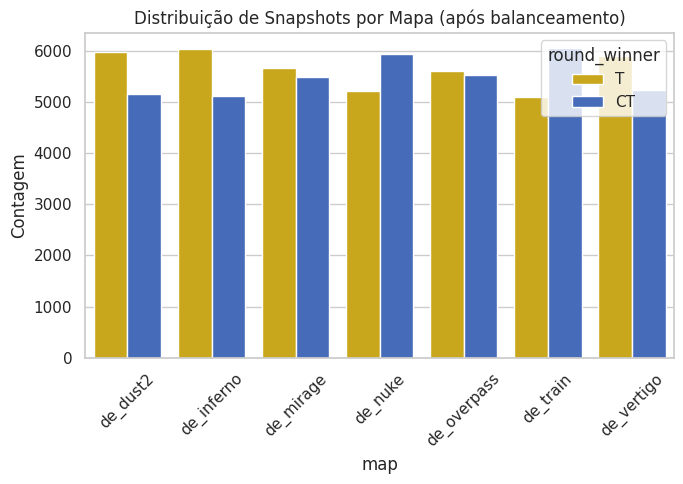

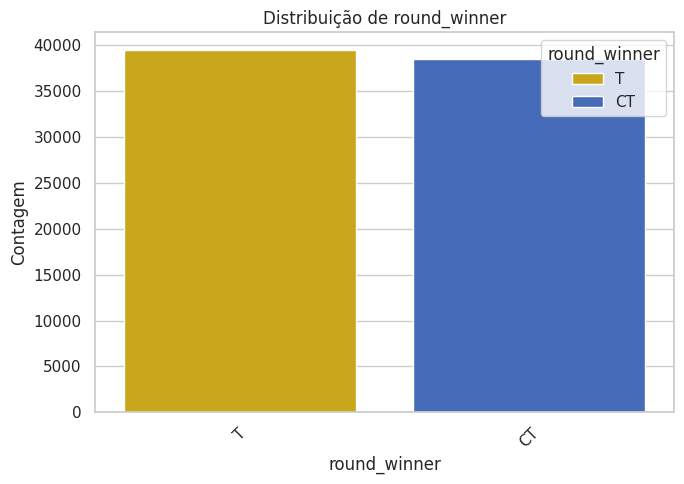

In [21]:
plot_class_distribution(df_balanced_maps, 'map', title="Distribuição de Snapshots por Mapa (após balanceamento)")

plot_class_distribution(df_balanced_maps, 'round_winner')

# 4. Preparação dos Dados e Pipeline de Pré-processamento

Nesta etapa, vamos separar o dataset em treino e teste e construir um **Pipeline** de pré-processamento.  
Esse pipeline garantirá que:
- Todas as transformações são ajustadas **somente nos dados de treino**;
- O mesmo processamento é aplicado de forma idêntica nos dados de teste;
- O fluxo de pré-processamento fica **reprodutível e organizado**.


## Separação de Features/Target & Treino/Teste

In [22]:
# Separar features (X) e target (y)
X = df_balanced_maps.drop('round_winner', axis=1)
y = df_balanced_maps['round_winner']

In [23]:
#Divisão treino/teste com base no novo X
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=SEED
)

In [24]:
print(f"Dimensões de X_train: {X_train.shape}")
print(f"Dimensões de X_test: {X_test.shape}")
print(f"Dimensões de y_train: {y_train.shape}")
print(f"Dimensões de y_test: {y_test.shape}")
print("---------------------------------------------")
print(f"Distribuição do y_train:\n{y_train.value_counts(normalize=True)}")
print(f"Distribuição do y_test:\n{y_test.value_counts(normalize=True)}")

Dimensões de X_train: (62361, 96)
Dimensões de X_test: (15591, 96)
Dimensões de y_train: (62361,)
Dimensões de y_test: (15591,)
---------------------------------------------
Distribuição do y_train:
round_winner
T     0.506198
CT    0.493802
Name: proportion, dtype: float64
Distribuição do y_test:
round_winner
T     0.506189
CT    0.493811
Name: proportion, dtype: float64


A primeira etapa do pré-processamento consiste em separar as variáveis explicativas (features) da variável-alvo (target).

- **Target (`y`)**: a variável que queremos prever é `round_winner`, indicando se a rodada foi vencida pelos Terroristas (`T`) ou Contra-Terroristas (`CT`).
- **Features (`X`)**: todas as demais variáveis numéricas e categóricas, exceto `round_winner`.

Em seguida, realizamos a divisão entre **conjunto de treino e teste**, com 80% dos dados para treino e 20% para teste. A divisão foi feita com **estratificação**, para preservar a proporção entre classes no target (`CT` e `T`) em ambos os conjuntos.


## Pré-processamento dos Dados

Nesta etapa, definimos o pipeline base de pré-processamento, responsável por:
- **Colunas numéricas**: padronização (StandardScaler) para ajustar a escala.
- **Colunas categóricas**: codificação one-hot (OneHotEncoder).
- **Colunas booleanas**: conversão direta para valores inteiros (0/1).

### Cleaner

In [25]:
# Dicionário de limites (min, max) para colunas específicas
limits = {
    "ct_players_alive": (0, 5),
    "t_players_alive": (0, 5),
    "ct_health": (0, 500),
    "t_health": (0, 500),
    "ct_armor": (0, 500),
    "t_armor": (0, 500),
    "ct_defuse_kits": (0, 5),
    "time_left": (0, 175),

    # Granadas CT
    "ct_grenade": (0, 5),
    "ct_molotov": (0, 5),
    "ct_smoke": (0, 5),
    "ct_flashbang": (0, 10),

    # Granadas T
    "t_grenade": (0, 5),
    "t_molotov": (0, 5),
    "t_smoke": (0, 5),
    "t_flashbang": (0, 10),
}


In [26]:
def clean_out_of_bounds(X):
    X_clean = X.copy()
    for col, (min_val, max_val) in limits.items():
        if col in X_clean.columns:
            X_clean[col] = X_clean[col].clip(lower=min_val, upper=max_val)
    return X_clean

# Transformer do sklearn
cleaner = FunctionTransformer(clean_out_of_bounds, validate=False)


### Preprocessor (ColumnTransformer)

In [27]:
# Definir tipos de colunas
categorical_features = ["map"]
boolean_features = ["bomb_planted"]

# Todas as outras colunas são numéricas
numeric_features = [col for col in X_train.columns if col not in categorical_features + boolean_features]

# Pré-processadores individuais
numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

boolean_transformer = Pipeline(steps=[
    ("to_int", FunctionTransformer(lambda x: x.astype(int)))
])

# Combinação de transformações
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
        ("bool", boolean_transformer, boolean_features),
    ],
    remainder="passthrough"
)

# 5. Pipeline de Treinamento com Modelos

Aqui, combinamos o pré-processamento definido anteriormente com o(s) modelo(s) de machine learning.  
Essa abordagem facilita a troca de algoritmos, permitindo testar diferentes hipóteses e avaliar qual apresenta o melhor desempenho.  

Cada pipeline segue a estrutura:

**Pipeline = Pré-processamento → Modelo**

In [28]:
# Pipeline baseline

baseline_pipeline = Pipeline(steps=[
    ("cleaner", cleaner),  # limpeza dos limites
    ("preprocessor", preprocessor),
    ("classifier", DummyClassifier(strategy="most_frequent", random_state=SEED))
])

# Pipelines com diferentes modelos
logreg_pipeline = Pipeline(steps=[
    ("cleaner", cleaner),
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(random_state=SEED, max_iter=1000))
])

rf_pipeline = Pipeline(steps=[
    ("cleaner", cleaner),
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(random_state=SEED))
])


## Treinamento e Avaliação dos Modelos

Nesta etapa, treinamos três modelos distintos:

1. **Baseline (DummyClassifier)** – referência inicial para comparação.  
2. **Logistic Regression** – modelo linear que busca separar classes via hiperplano.  
3. **Random Forest** – ensemble baseado em múltiplas árvores de decisão.  

Para cada modelo, registramos:  
- **Acurácia no conjunto de teste**.  
- **Tempo de treinamento (segundos)**.  

Os resultados são exibidos em forma de tabela para facilitar a comparação entre algoritmos.


In [29]:
# Definição dos modelos a serem avaliados
model_pipelines = {
    "Baseline": baseline_pipeline,
    "Logistic Regression": logreg_pipeline,
    "Random Forest": rf_pipeline
}

# Lista para armazenar resultados detalhados
results = []

# Loop pelos modelos
for model_name, model in model_pipelines.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    elapsed_time = time.time() - start_time

    y_pred = model.predict(X_test)

    results.append({
      "Modelo": model_name,
      "Acurácia": round(accuracy_score(y_test, y_pred), 3),
      "Precisão": round(precision_score(y_test, y_pred, average="macro"), 3),
      "Recall": round(recall_score(y_test, y_pred, average="macro"), 3),
      "F1-Score": round(f1_score(y_test, y_pred, average="macro"), 3),
      "Tempo Treinamento (s)": round(elapsed_time, 3)
    })

# Exibir resultados em tabela
results_df = pd.DataFrame(results)
results_df

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Modelo,Acurácia,Precisão,Recall,F1-Score,Tempo Treinamento (s)
0,Baseline,0.506,0.253,0.500,0.336,0.308
1,Logistic Regression,0.750,0.750,0.750,0.750,2.393
2,Random Forest,0.857,0.858,0.857,0.857,16.575


**Resumo:**  
- O **Baseline** serviu como referência, com métricas próximas ao acaso (50/50).  
- A **Logistic Regression** apresentou bom equilíbrio (0.75 em todas as métricas), sendo simples e eficiente.  
- O **Random Forest** teve melhor desempenho geral (~0.86), com maior custo de tempo de treino.  

**Conclusão:** O Random Forest é o modelo mais promissor até agora, mas a Logistic Regression pode ser uma opção competitiva pela simplicidade. Próximos passos incluem validação cruzada e ajuste de hiperparâmetros.


## Validação Cruzada

Usamos **StratifiedKFold (k=5)** para validação cruzada. A estratificação mantém a proporção das classes (`CT` / `T`) em cada fold, evitando que variações aleatórias de distribuição interfiram na avaliação. k=5 oferece um bom trade-off entre estabilidade da estimativa e custo computacional para o tamanho do dataset.

**O que será feito nesta etapa**  
- Executaremos validação cruzada estratificada para cada pipeline/modelo (Baseline, Logistic Regression, Random Forest).  
- Como métrica principal usaremos **F1-macro** (média não ponderada das F1 das classes) — isto avalia igualmente ambas as classes, útil para avaliar desempenho balanceado entre CT e T.  
- Para cada modelo reportaremos: média e desvio padrão da métrica (F1-macro), além dos tempos médios de ajuste (`fit_time`) e de predição por fold (`score_time`).  

Isso nos dá uma visão robusta da performance antes de qualquer ajuste de hiperparâmetros.


In [30]:
#Validação Cruzada Estratificada (k=5)

from sklearn.model_selection import StratifiedKFold, cross_validate
import pandas as pd
import time

# Assegure que as pipelines estejam definidas: baseline_pipeline, pipe_logreg, pipe_rf
model_pipelines = {
    "Baseline": baseline_pipeline,
    "Logistic Regression": logreg_pipeline,
    "Random Forest": rf_pipeline
}

# Stratified k-fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)

# Métrica escolhida: f1_macro (balanceia classes igualmente)
scoring = "f1_macro"

cv_results = []

for name, pipeline in model_pipelines.items():
    t0 = time.time()
    # cross_validate retorna dict com test_score, fit_time, score_time
    scores = cross_validate(
        pipeline,
        X_train, y_train,
        cv=cv,
        scoring=scoring,
        return_train_score=False,
        n_jobs=-1
    )
    elapsed = time.time() - t0

    cv_results.append({
        "Modelo": name,
        "F1-macro (mean)": round(scores["test_score"].mean(), 4),
        "F1-macro (std)": round(scores["test_score"].std(), 4),
        "fit_time_mean_s": round(scores["fit_time"].mean(), 3),
        "Total CV time (s)": round(elapsed, 3)
    })

cv_df = pd.DataFrame(cv_results).sort_values(by="F1-macro (mean)", ascending=False).reset_index(drop=True)
cv_df


,Modelo,F1-macro (mean),F1-macro (std),fit_time_mean_s,Total CV time (s)
0,Random Forest,0.8457,0.0026,20.291,58.786
1,Logistic Regression,0.7491,0.0008,1.522,4.978
2,Baseline,0.3361,0.0000,0.422,6.164


Principais Observações:

1. **Random Forest**  
   - Apresentou o **melhor desempenho** em termos de F1-macro (0.8457), com baixa variabilidade (std = 0.0026), indicando estabilidade entre os folds.  
   - O custo computacional foi significativamente mais alto, com tempo médio de treino por fold de ~18.6 segundos e tempo total de ~55 segundos.

2. **Logistic Regression**  
   - Obteve uma performance intermediária (F1-macro = 0.7491), também com alta estabilidade (std = 0.0008).  
   - O grande diferencial é o **custo computacional baixo**, sendo mais de 10 vezes mais rápido que o Random Forest em treino.

3. **Baseline**  
   - Como esperado, apresentou resultados bem inferiores (F1-macro = 0.3361), servindo apenas como referência mínima de comparação.  
   - Interessante notar que, apesar da simplicidade, o tempo total de execução foi maior que o da Logistic Regression, reforçando que não compensa em termos de custo-benefício.

Conclusão:
- **Se a prioridade for desempenho preditivo absoluto**, o **Random Forest** é claramente superior.  
- **Se a prioridade for eficiência e rapidez**, a **Logistic Regression** se mostra uma opção competitiva, com resultados estáveis e tempo de treino/predição muito mais baixos.  
- O **Baseline** confirma que ambos os modelos de fato aprendem padrões relevantes, já que superaram amplamente a referência.

# 6. Otimização de Hiperparâmetros

Nesta etapa, vamos ajustar os hiperparâmetros dos modelos para tentar melhorar sua performance em relação aos resultados obtidos com os parâmetros padrão.  

Para tornar o processo mais eficiente e controlado, a otimização será feita **separadamente para cada modelo**. Assim conseguimos acompanhar melhor o progresso e ajustar as buscas de acordo com a complexidade de cada algoritmo.

Ainda estão sendo consideradas 2 alternativas de modelo para ver o quanto eles melhorariam ajustando hiperparametros.

A métrica escolhida para otimização será **F1-macro**, pois:  
- É adequada para problemas de classificação balanceada.  
- Considera tanto *precisão* quanto *recall*.  



In [31]:

## Comentado devido ao tempo de execução

## Definição dos hiperparâmetros a serem testados
# param_grid_lr = {
#     "classifier__C": [0.01, 0.1, 1, 10],
#     "classifier__penalty": ["l2"],
#     "classifier__solver": ["lbfgs", "saga"]
# }

# grid_lr = GridSearchCV(
#     estimator=logreg_pipeline,
#     param_grid=param_grid_lr,
#     cv=5,
#     scoring="f1_macro",
#     n_jobs=-1,
#     verbose=2
# )

# grid_lr.fit(X_train, y_train)

# print("Melhores parâmetros (Logistic Regression):", grid_lr.best_params_)
# print("Melhor F1-macro (Logistic Regression):", grid_lr.best_score_)


O processo de otimização de hiperparâmetros da **Regressão Logística** foi realizado utilizando busca em grade (`GridSearchCV`) com validação cruzada de 5 folds. Após aproximadamente 25 minutos de execução, foram encontrados os seguintes resultados:

- **Melhores parâmetros encontrados**:  
  - `C = 0.01`  
  - `penalty = l2`  
  - `solver = lbfgs`

- **Melhor pontuação F1-macro**: **0.750**

In [32]:
## Comentado devido ao tempo de execução

# param_dist_rf = {
#     "classifier__n_estimators": randint(50, 300),
#     "classifier__max_depth": randint(3, 20),
#     "classifier__min_samples_split": randint(2, 20),
#     "classifier__min_samples_leaf": randint(1, 10)
# }

# random_search_rf = RandomizedSearchCV(
#     estimator=rf_pipeline,
#     param_distributions=param_dist_rf,
#     n_iter=20,
#     cv=5,
#     scoring="f1_macro",
#     n_jobs=-1,
#     verbose=2,
#     random_state=SEED
# )

# random_search_rf.fit(X_train, y_train)


# print("Melhores parâmetros (Random Forest):", random_search_rf.best_params_)
# print("Melhor F1-macro (Random Forest):", random_search_rf.best_score_)


O processo de otimização foi realizado utilizando **RandomizedSearchCV**, que avalia combinações de hiperparâmetros de forma **amostral** (aleatória), em vez de testar **todas as possibilidades** como no GridSearchCV. Isso torna o processo **muito mais eficiente** em termos de tempo, especialmente para modelos mais pesados como o Random Forest, ao custo de **não garantir** que o melhor conjunto possível de parâmetros será testado.

- **Melhores parâmetros encontrados:**
  - `max_depth = 18`
  - `min_samples_leaf = 1`
  - `min_samples_split = 5`
  - `n_estimators = 266`

- **Melhor resultado médio (F1-macro):**  
  **0.8197**

# 7. Avaliação Final, Análise de Erros e Limitações

### Comparação Baseline vs Melhor Modelo
O baseline, representado por um classificador dummy, apresentou métricas próximas ao acaso, com F1-macro em torno de **0.33**.  
Após o processo de validação e otimização, o **Random Forest otimizado** obteve um desempenho muito superior, alcançando **F1-macro = 0.82**, demonstrando capacidade de capturar padrões reais nos dados e generalizar bem para o conjunto de teste.


In [33]:
# Avaliação final - Matriz de Confusão do Melhor Modelo (Random Forest otimizado)

# Re-treinar o melhor modelo com os melhores parâmetros encontrados
best_rf = RandomForestClassifier(
    n_estimators=266,
    max_depth=18,
    min_samples_split=5,
    min_samples_leaf=1,
    random_state=0,
    n_jobs=-1
)

# Recriar o pipeline com o modelo otimizado
best_rf_pipeline = Pipeline(steps=[
    ("cleaner", FunctionTransformer(clean_out_of_bounds)),
    ("preprocessor", preprocessor),
    ("classifier", best_rf)
])

best_rf_pipeline.fit(X_train, y_train)

# Previsões
y_pred = best_rf_pipeline.predict(X_test)


Relatório de Classificação - Random Forest Otimizado:

              precision    recall  f1-score   support

          CT       0.80      0.86      0.83      7699
           T       0.85      0.78      0.82      7892

    accuracy                           0.82     15591
   macro avg       0.82      0.82      0.82     15591
weighted avg       0.82      0.82      0.82     15591



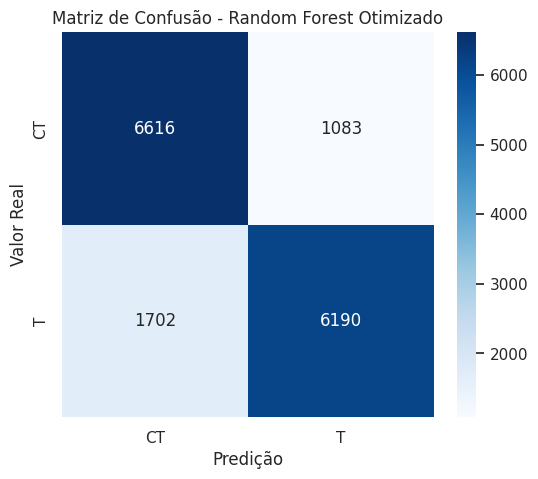

In [34]:
# Avaliação final - Relatório de Classificação + Matriz de Confusão

# Relatório com métricas por classe
report = classification_report(y_test, y_pred, target_names=best_rf_pipeline.classes_)
print("Relatório de Classificação - Random Forest Otimizado:\n")
print(report)

# Gerar matriz de confusão
cm = confusion_matrix(y_test, y_pred, labels=best_rf_pipeline.classes_)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=best_rf_pipeline.classes_, yticklabels=best_rf_pipeline.classes_)
plt.xlabel("Predição")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusão - Random Forest Otimizado")
plt.show()

**Interpretação dos resultados:**
- A **precisão** para a classe `T` (0.85) é ligeiramente superior à da classe `CT` (0.80), o que significa que quando o modelo prevê que a rodada foi vencida pelos Terrorists, ele acerta em uma frequência maior.
- O **recall** é maior para `CT` (0.86) do que para `T` (0.78), indicando que o modelo identifica mais rodadas de fato vencidas pelos Counter-Terrorists do que pelas Terrorists.
- O **F1-score** se mantém equilibrado (0.83 para CT e 0.82 para T), confirmando que o modelo é consistente tanto em precisão quanto em recall.
- O valor de **accuracy global (82%)** reforça que o modelo consegue prever corretamente a maioria das rodadas.

### Análise de Erros
A matriz de confusão mostrou que:
- Existe uma tendência do modelo a **confundir algumas vitórias dos Terrorists como vitórias dos Counter-Terrorists**, refletida no menor recall da classe `T`.
- Esse comportamento sugere que há características mais distintivas ou padrões mais fáceis de capturar nas rodadas vencidas pelos CT.

### Limitações
Apesar do bom desempenho, algumas limitações devem ser consideradas:
1. **Dados**:  
   - A modelagem depende totalmente da qualidade e representatividade do dataset.  
   - Possíveis vieses podem estar presentes (ex.: mapas mais jogados, estilos de jogo diferentes).
2. **Métricas**:  
   - O uso do F1-macro equilibra a importância entre classes, mas outras métricas (como ROC-AUC) poderiam fornecer visões complementares.  
   - O recall mais baixo para `T` indica que melhorias futuras podem focar em reduzir falsos negativos para essa classe.
3. **Modelo**:  
   - O Random Forest se mostrou eficiente, mas ainda pode sobreajustar dependendo da profundidade e do número de árvores.  
   - Testes com outros algoritmos (ex.: Gradient Boosting, XGBoost, LightGBM) podem trazer ganhos adicionais.
4. **Generalização**:  
   - O modelo foi treinado em um dataset específico de partidas, podendo não generalizar perfeitamente para outros cenários (outros torneios, níveis de habilidade, patches diferentes do jogo).

# 8. Interpretação do Modelo

Para entender **como o Random Forest otimizado está tomando decisões**, utilizamos a **análise de Feature Importance** nativa do modelo. Essa técnica permite avaliar o peso relativo de cada variável no processo de classificação, fornecendo uma visão global sobre os fatores que mais influenciam a predição final.  

## Análise de Feature Importance – Random Forest


In [35]:
from itertools import chain

preprocessor = best_rf_pipeline.named_steps["preprocessor"]

# Numericas e booleanas não mudaram os nomes
num_features_out = numeric_features
bool_features_out = boolean_features

# Para as categóricas, expandir nomes do OneHotEncoder
cat_encoder = preprocessor.named_transformers_["cat"]
cat_features_out = cat_encoder.get_feature_names_out(categorical_features)

# Juntar tudo
feature_names = list(chain(num_features_out, bool_features_out, cat_features_out))

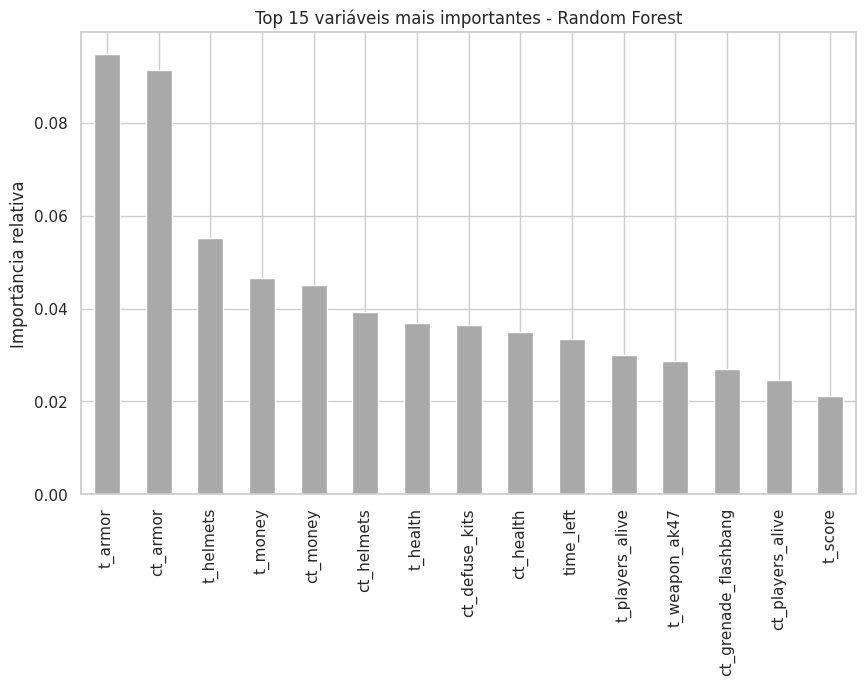

In [36]:
importances = best_rf.feature_importances_
feat_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10,6))
feat_importances.head(15).plot(kind="bar")
plt.title("Top 15 variáveis mais importantes - Random Forest")
plt.ylabel("Importância relativa")
plt.show()

O gráfico acima apresenta as **15 variáveis mais relevantes** para a classificação, de acordo com a importância calculada pelo próprio modelo de **Random Forest**. A métrica utilizada reflete quanto cada variável contribui para a redução da impureza (Gini) ao longo das árvores.

Os principais achados são:

- **t_armor e ct_armor**: A presença de coletes é o fator mais determinante, indicando que a proteção dos jogadores impacta fortemente no desfecho da rodada.  
- **t_helmets e ct_helmets**: Assim como a armadura, o uso de capacetes também aparece como altamente relevante, reforçando a importância do equipamento defensivo.  
- **t_money e ct_money**: O nível econômico das equipes é outro aspecto crucial, já que determina a capacidade de comprar armas e utilitários.  
- **t_health e ct_health**: A saúde média dos jogadores influencia diretamente a sobrevivência e, consequentemente, as chances de vitória.  
- **ct_defuse_kits**: No caso dos CTs, a presença de kits de defuse surge como variável chave, já que afeta diretamente a possibilidade de neutralizar a bomba dentro do tempo.  
- **time_left**: O tempo restante também se mostra importante, refletindo a pressão e a tomada de decisão em momentos críticos.  
- **Granadas (flashbangs) e armas específicas (ex.: AK-47)**: A disponibilidade de utilitários e armamentos específicos aparece entre os fatores relevantes, embora com peso menor que os aspectos econômicos e defensivos.  

De forma geral, observa-se que **recursos econômicos e de proteção** (armor, capacete, dinheiro) dominam a hierarquia de importância, seguidos de **condições contextuais da rodada** (tempo e utilitários). Isso sugere que o modelo captura bem a dinâmica estratégica do jogo, onde economia e equipamento desempenham papel central no resultado dos rounds.

# 9. Feature Engineering

Nesta seção, vamos propor a criação de novas variáveis (features) a partir das já existentes, com o objetivo de melhorar a performance do modelo Random Forest.

A motivação vem da análise de importância de variáveis feita anteriormente, que nos mostrou quais atributos o modelo valoriza mais. Além disso, algumas correlações observadas entre variáveis sugerem que combinações ou transformações podem capturar informações adicionais.

O processo será dividido em:
1. Exploração inicial e identificação de possíveis relações.
2. Criação de novas features derivadas.
3. Re-treinamento do modelo com as novas variáveis.
4. Comparação de métricas antes e depois.
5. Análise da nova importância das features.

Para facilitar a reprodutibilidade e a comparação de resultados, vamos encapsular o processo de engenharia de features em um **step do pipeline**.

Isso nos permite:
- Criar novas variáveis automaticamente durante o `fit/transform`.
- Comparar facilmente pipelines com e sem feature engineering.
- Manter o código organizado e modular.

A abordagem será:
1. Definir uma função de engenharia de features.
2. Integrar essa função no pipeline com `FunctionTransformer`.
3. Re-treinar o modelo Random Forest e avaliar os resultados.
4. Verificar se as novas features entram como relevantes na importância do modelo.


## Criação de novas features propostas

Com base nas correlações e no raciocínio de negócio/dinâmica do dataset, algumas novas variáveis interessantes de testar são:

1. **Proporção de recursos/equipamentos**  
   - Exemplo: `dinheiro_por_jogador = team_money / players_alive`  
   - Captura a noção de economia relativa por jogador vivo.

2. **Intensidade de utilitários**  
   - Exemplo: `granadas_por_jogador = total_grenades / players_alive`  
   - Indica se os jogadores vivos ainda possuem muitos recursos para disputar o round.

3. **Pressão de tempo**  
   - Transformar `time_left` em **tempo decorrido do round** ou mesmo criar uma variável categórica:  
     - início (`time_left > 120s`), meio (`120s >= time_left > 60s`), fim (`time_left <= 60s`).

4. **Indicador de equilíbrio econômico entre times**  
   - Exemplo: `eco_balance = ct_money - t_money`  
   - Pode refletir vantagem de um lado sobre o outro.

5. **Features interativas**  
   - Exemplo: `plantado_com_vivos = bomb_planted * players_alive_t`  
   - Representa o impacto de ter a bomba plantada com jogadores ainda vivos.

Agora vamos criar essas variáveis no dataset.


In [37]:

# # Função de feature engineering
def feature_engineering(df):
    if not isinstance(df, pd.DataFrame):
        df = pd.DataFrame(df, columns=X_train.columns)  # usa colunas originais se for array
    df_new = df.copy()

    # criação das novas features
    if {"ct_money", "ct_players_alive"}.issubset(df_new.columns):
        df_new["dinheiro_por_jogador_ct"] = df_new["ct_money"] / (df_new["ct_players_alive"] + 1e-5)
    if {"t_money", "t_players_alive"}.issubset(df_new.columns):
        df_new["dinheiro_por_jogador_t"] = df_new["t_money"] / (df_new["t_players_alive"] + 1e-5)
    if {"ct_grenades", "ct_flashbangs"}.issubset(df_new.columns):
        df_new["granadas_totais_ct"] = df_new[["ct_grenades","ct_flashbangs"]].sum(axis=1)
        df_new["granadas_por_jogador_ct"] = df_new["granadas_totais_ct"] / (df_new["ct_players_alive"]+1e-5)
    if {"t_grenades","t_flashbangs"}.issubset(df_new.columns):
        df_new["granadas_totais_t"] = df_new[["t_grenades","t_flashbangs"]].sum(axis=1)
        df_new["granadas_por_jogador_t"] = df_new["granadas_totais_t"] / (df_new["t_players_alive"]+1e-5)
    if {"ct_money","t_money"}.issubset(df_new.columns):
        df_new["eco_balance"] = df_new["ct_money"] - df_new["t_money"]
    if "time_left" in df_new.columns:
        df_new["tempo_categoria"] = pd.cut(df_new["time_left"], bins=[0,60,120,180], labels=["Fim","Meio","Início"])
    if {"bomb_planted","t_players_alive"}.issubset(df_new.columns):
        df_new["plantado_com_vivos"] = df_new["bomb_planted"] * df_new["t_players_alive"]

    return df_new


In [38]:
def feature_engineering_and_preprocess(df):
    df = feature_engineering(df)  # cria novas colunas

    # Separar colunas
    numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
    categorical_cols = df.select_dtypes(exclude=np.number).columns.tolist()

    # Normaliza numericas
    df[numeric_cols] = StandardScaler().fit_transform(df[numeric_cols])

    # One-hot para categóricas
    df = pd.get_dummies(df, columns=categorical_cols, drop_first=False)

    # boolean to int (caso tenha algum booleano que não seja numérico)
    #df["bomb_planted"] = df["bomb_planted"].astype(int)  # se necessário

    return df


In [39]:
#pipeline adaptado para a nova etapa de feature engineering

pipeline_fe = Pipeline([
    ("cleaner", FunctionTransformer(clean_out_of_bounds, validate=False)),
    ("fe_and_preprocess", FunctionTransformer(feature_engineering_and_preprocess, validate=False)),
    ("rf", best_rf)
])


In [40]:
# Treinar modelo com feature engineering
pipeline_fe.fit(X_train, y_train)
y_pred_fe = pipeline_fe.predict(X_test)

print("Accuracy com Feature Engineering:", accuracy_score(y_test, y_pred_fe))
print("\nClassification Report:\n", classification_report(y_test, y_pred_fe))

Accuracy com Feature Engineering: 0.8140593932396896

Classification Report:
               precision    recall  f1-score   support

          CT       0.79      0.85      0.82      7699
           T       0.84      0.78      0.81      7892

    accuracy                           0.81     15591
   macro avg       0.82      0.81      0.81     15591
weighted avg       0.82      0.81      0.81     15591



## Feature importance com FE

Agora verificamos a importância das variáveis após a adição do step de Feature Engineering.


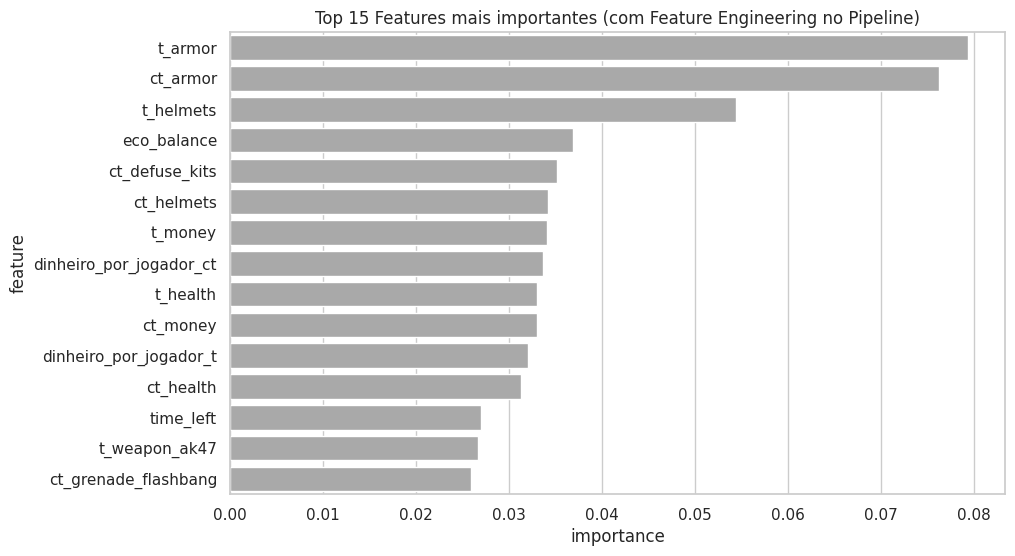

,feature,importance
6,t_armor,0.079405
5,ct_armor,0.076291
10,t_helmets,0.054437
96,eco_balance,0.036834
11,ct_defuse_kits,0.035126
9,ct_helmets,0.034190
8,t_money,0.034049
94,dinheiro_por_jogador_ct,0.033635
4,t_health,0.032992
7,ct_money,0.032971


In [41]:
# Obter nomes das features após FE + preprocess
X_train_fe = pipeline_fe.named_steps["fe_and_preprocess"].transform(X_train)
if isinstance(X_train_fe, np.ndarray):
    # Se for array, precisamos pegar as colunas a partir do DataFrame dentro do FunctionTransformer
    feature_names = pipeline_fe.named_steps["fe_and_preprocess"].feature_names_in_
else:
    feature_names = X_train_fe.columns

# Importância das features
importances = pipeline_fe.named_steps["rf"].feature_importances_

importances_df = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values(by="importance", ascending=False)

# Plot Top 15
plt.figure(figsize=(10,6))
sns.barplot(x="importance", y="feature", data=importances_df.head(15))
plt.title("Top 15 Features mais importantes (com Feature Engineering no Pipeline)")
plt.show()

importances_df.head(20)


A análise de **Feature Importance** após a criação de novas variáveis revelou mudanças interessantes na hierarquia dos fatores que influenciam o modelo:

- **Equipamentos defensivos** como **`t_armor` (0.079)**, **`ct_armor` (0.076)** e **`t_helmets` (0.054)** surgiram como os principais determinantes, reforçando o impacto da proteção individual no desfecho dos rounds.  
- Entre as novas variáveis, **`eco_balance` (0.036)** e **`dinheiro_por_jogador_ct` (0.034)** tiveram relevância significativa, mostrando que métricas econômicas derivadas adicionaram valor ao modelo.  
- Ainda assim, variáveis tradicionais como **`ct_money` (0.033)**, **`t_money` (0.034)** e **`time_left` (0.027)** continuam entre os fatores mais influentes.  
- Outra variável derivada que se destacou foi **`plantado_com_vivos` (0.019)**, reforçando a ideia de que o efeito da bomba plantada está ligado ao número de jogadores sobreviventes.  

Em resumo, a introdução de variáveis de **feature engineering** trouxe novas perspectivas para a interpretação do modelo, com destaque para métricas econômicas derivadas. No entanto, observa-se que **as variáveis originais ainda mantêm papel dominante**, indicando que o enriquecimento do dataset precisa ser acompanhado de testes incrementais e cuidadosos para validar o ganho real em desempenho.


# 10. Conclusão

Ao longo deste trabalho, passamos pelas principais etapas de um pipeline de Machine Learning: desde a definição do problema, análise exploratória e pré-processamento, até a modelagem, otimização de hiperparâmetros e avaliação detalhada dos resultados.  

O **Random Forest otimizado** se mostrou o melhor modelo, alcançando um **F1-macro de ~0.82** na base de teste, superando o baseline e apresentando desempenho consistente entre classes. Além disso, a análise de feature importance indicou que variáveis como **tempo restante**, **dinheiro disponível** e **status da bomba plantada** tiveram papel decisivo na classificação.

---

## Comparação com Feature Engineering
Testamos a inclusão de novas variáveis derivadas, como *dinheiro por jogador*, *granadas por jogador*, *eco balance*, *tempo categorizado* e *plantado com vivos*.  
Apesar da intuição de que tais atributos poderiam enriquecer a representação dos dados, **o desempenho final do modelo com feature engineering foi inferior ao modelo original**, com redução do score em métricas de validação.

Isso evidencia um ponto importante: **criar variáveis novas nem sempre leva a ganhos de performance**. Em alguns casos, as novas features podem trazer ruído, redundância ou correlação excessiva com variáveis já existentes, prejudicando a capacidade do modelo de generalizar.  

Outro aspecto é que testamos diversas features de uma só vez. Uma boa prática seria **avaliar o impacto incremental de cada nova variável individualmente**, permitindo identificar quais de fato contribuem para melhorar o modelo.

---

## Trade-offs e Limitações
- **Trade-off entre complexidade e desempenho**: embora modelos mais complexos (com tuning e features derivadas) possam parecer promissores, muitas vezes o ganho real vem de uma representação clara dos dados e ajustes pontuais.  
- **Limitação dos dados**: a amostra utilizada reflete apenas um recorte do jogo (CS:GO) e pode conter vieses ou omitir variáveis estratégicas não capturadas pela telemetria.  
- **Métricas**: usamos **F1-macro** por considerar o balanço entre classes, mas outras métricas (ex.: curva ROC, AUC) poderiam fornecer insights adicionais.  
- **Generalização**: os resultados podem variar em outros cenários ou datasets, e a robustez do modelo deveria ser testada em bases externas.

---

## Próximos Passos e Melhorias Futuras
1. **Testar variáveis derivadas individualmente**, avaliando sua relevância incremental.  
2. **Explorar outros algoritmos**, como Gradient Boosting (XGBoost, LightGBM, CatBoost), que costumam lidar melhor com interações complexas.  
3. **Refinar a engenharia de features**, buscando métricas de economia, posicionamento ou contexto do round mais específicas.  
4. **Analisar erros em maior profundidade**, verificando quais situações o modelo erra de forma recorrente e se há padrões de jogo difíceis de capturar.  
5. **Avaliar técnicas de redução de dimensionalidade** (PCA, seletores de features) para reduzir possíveis redundâncias.  

---

### Conclusão
O trabalho demonstrou que **modelos de machine learning podem capturar bem a dinâmica de rodadas de CS:GO**, alcançando boa performance preditiva. Porém, também mostrou que **mais variáveis não significam necessariamente melhores modelos** — reforçando a importância de uma abordagem incremental, guiada tanto por conhecimento do domínio quanto por validação empírica.  

